In [1]:
%load_ext autoreload
%autoreload 2
import cv2
import numpy as np
import torch
import torch.nn as nn
from utils import *
from dataloaders.RealBlur import *
import matplotlib.pyplot as plt
from torchvision import transforms
import einops
from dataloaders.ColorizationDataset import ColorizationDataset

In [3]:
dataset = ColorizationDataset(True)
print(dataset.filenames)

['2008_000008', '2008_000015', '2008_000019', '2008_000023', '2008_000028', '2008_000033', '2008_000036', '2008_000037', '2008_000041', '2008_000045', '2008_000053', '2008_000060', '2008_000066', '2008_000070', '2008_000074', '2008_000085', '2008_000089', '2008_000093', '2008_000095', '2008_000096', '2008_000097', '2008_000099', '2008_000103', '2008_000105', '2008_000109', '2008_000112', '2008_000128', '2008_000131', '2008_000132', '2008_000141', '2008_000142', '2008_000143', '2008_000144', '2008_000148', '2008_000151', '2008_000154', '2008_000162', '2008_000176', '2008_000181', '2008_000185', '2008_000187', '2008_000188', '2008_000189', '2008_000191', '2008_000192', '2008_000193', '2008_000196', '2008_000197', '2008_000199', '2008_000202', '2008_000207', '2008_000217', '2008_000226', '2008_000227', '2008_000235', '2008_000236', '2008_000237', '2008_000238', '2008_000252', '2008_000255', '2008_000259', '2008_000260', '2008_000262', '2008_000266', '2008_000273', '2008_000275', '2008_000

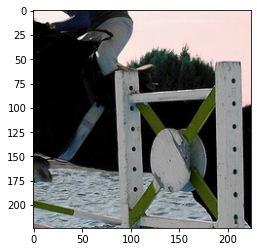

In [4]:
# PSNR sanity check
def show_image(img):
    plt.figure()
    plt.imshow(cv2.cvtColor(img.transpose((1, 2, 0)), cv2.COLOR_BGR2RGB))
    plt.show()

_, gt = dataset[0]
show_image(gt)

In [6]:
from models.axialtransformer import *

blur, gt = dataset[0]

cropped_image = gt[None, :, :512, :512]
cropped_blur = blur[None, :, :512, :512]

cropped_image_torch = torch.from_numpy(cropped_image).float()
print(cropped_image_torch.shape)

conv1x1 = nn.Conv2d(3, 128, 1)
transformer = AxialImageTransformer(dim=128, depth=12, reversible=True)

out = transformer(conv1x1(cropped_image_torch))
print(out.shape)

torch.Size([1, 3, 224, 224])
torch.Size([1, 128, 224, 224])
